In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [27]:
PATH = './insurance.csv'

In [28]:
df = pd.read_csv(PATH)

# [1] EDA : 탐색석 데이터 분석
1. MISSING VALUE 확인
2. 변수 간 단순 관계 확인
    - 수치형 데이터 : sns.pairplot
    - 범주형 데이터 : 범주형-target 간 관계 확인_violin / vox / scatter 플롯 활용

In [34]:
# Missing Value 확인
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

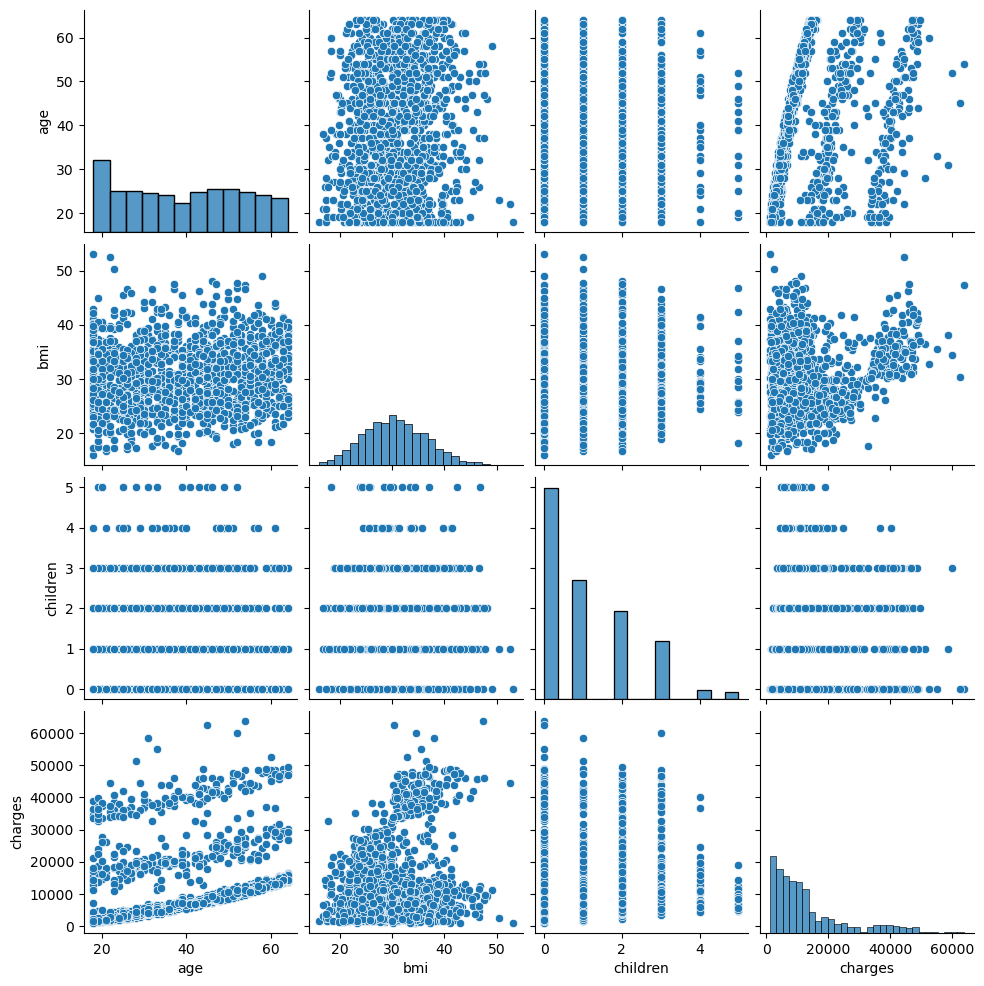

In [35]:
# 수치형 데이터 간 단순 관계 확인
sns.pairplot(df)

수치형 변수 간 단순 관계를 통해 알 수 있는 점.

1. target 변수인 charges는 skewed data이다 -> 정규화 필요
2. age-charge 관계에 선형 비스무리한 관계, 하지만 3줄이 뜸.
3. children과 charges는 아무런 상관이 없어보임
4. bmi와 charges는 약간 상관관계기 있을 것 같음

In [39]:
# 범주형 데이터 확인
df[['sex', 'smoker', 'region']]

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


In [13]:
x = df.drop(['charges'], axis=1)
y = df['charges']

In [ ]:
x = pd.get_dummies(x, drop_first=True)

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,False,True,False,False,True
1,18,33.770,1,True,False,False,True,False
2,28,33.000,3,True,False,False,True,False
3,33,22.705,0,True,False,True,False,False
4,32,28.880,0,True,False,True,False,False


In [18]:
x = sm.add_constant(x)

x.tail()

,const,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
1333,1.0,50,30.97,3,True,False,True,False,False
1334,1.0,18,31.92,0,False,False,False,False,False
1335,1.0,18,36.85,0,False,False,False,True,False
1336,1.0,21,25.80,0,False,False,False,False,True
1337,1.0,61,29.07,0,False,True,True,False,False


In [21]:
print(x.info())
print(y.dtype)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   const             1338 non-null   float64
 1   age               1338 non-null   int64  
 2   bmi               1338 non-null   float64
 3   children          1338 non-null   int64  
 4   sex_male          1338 non-null   bool   
 5   smoker_yes        1338 non-null   bool   
 6   region_northwest  1338 non-null   bool   
 7   region_southeast  1338 non-null   bool   
 8   region_southwest  1338 non-null   bool   
dtypes: bool(5), float64(2), int64(2)
memory usage: 48.5 KB
None
float64


In [22]:
x = x.astype(float)

x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   const             1338 non-null   float64
 1   age               1338 non-null   float64
 2   bmi               1338 non-null   float64
 3   children          1338 non-null   float64
 4   sex_male          1338 non-null   float64
 5   smoker_yes        1338 non-null   float64
 6   region_northwest  1338 non-null   float64
 7   region_southeast  1338 non-null   float64
 8   region_southwest  1338 non-null   float64
dtypes: float64(9)
memory usage: 94.2 KB


In [23]:
model = sm.OLS(y, x).fit()

In [24]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Thu, 20 Feb 2025   Prob (F-statistic):               0.00
Time:                        16:16:30   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.194e+04    987.819    -12.086      0.000   -1.39e+04      -1e+04
age                256.8564     11.899     21.587      0.000     233.514     280.199
bmi                339.1935     28.599     11.860      0.000     283.088     395.298
children           475.5005    137.804      3.451      0.001     205.163     745.838
sex_male          -131.3144    332.945     -0.394      0.693    -784.470     521.842
smoker_yes        2.385e+04    413.153     57.723      0.000     2.3e+04    2.47e+04
region_northwest  -352.9639    476.276     -0.741      0.459   -1287.298     581.370
region_southeast -1035.0220    478.692     -2.162      0.031   -1974.097     -95.947
region_southwest  -960.0510    477.933     -2.009      0.045   -1897.636     -22.466
==============================================================================
Omnibus:                      300.366   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              718.887
Skew:                           1.211   Prob(JB):                    7.86e-157
Kurtosis:                       5.651   Cond. No.                         311.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""